***Описание проекта***

Нам представлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation). Необходимо выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании

Данные представлены до 2016 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр.
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
-  «K-A» («Kids to Adults»)— «Для детей и взрослых»



# Изучение общей информации о данных

Импортируем основные библиотеки для проведения анализа

In [1]:
import pandas as pd # Импортируем основные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

В переменную `data` запишем наш датасет и выведим его на экран

In [2]:
try:
    data = pd.read_csv(r'C:\Users\MATVEY\Desktop\Сборный проект ЯП\games.csv') # Считываем файл и записываем его в перемеенную
except:
    data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выведим общую информацию о датасете методов `info()`

In [3]:
data.info() # Общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведим основные характеристики столбцов, которые содержат в себе количественные переменные
My 

In [4]:
data.describe() # Основные характеристики датасета

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Вывод

Мы убедились в том, что нам действитетельно предоставлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Количество строк в датасете - 16715, столбцов - 11.

Согласно описательной документации датасет содержит следующие столбцы: 

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
  Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
  им подходящую возрастную категорию.
  
Данные за 2016 год могут быть неполными.

Для более детального погружения в исследование необходимо провести предобработку данных

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера ✔️</b>
    
Отличная вводная часть.    
</div>

# Предобработка данных

Выведим первые 5 строк датасета на экран

In [5]:
data.head() # Первые пять строк датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Можем заметить, что в названиях столбцов присутствует верхний регистр.

Поменяем название столбцов с учётом того, что все буквы в название должны быть строчными

In [6]:
data.columns = data.columns.str.lower() # Переводим название всех колонок в нижний регистр
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выведим количество пропусков в каждом столбце

In [7]:
data.isnull().sum() # Подсчитываем количество пропущенных значений в датасете

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Столбец `name` насчитывает два пропуска. Взглянем на полную информацию об играх, в которых в столбце `name` пропущенно значение.

In [8]:
data[data['name'].isna()] # Логическая индексация

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Судя по всему, игры с пропуском в названии довольно старые и малоизвестные. Так как их количество крайне мало, удалим их из датасета

In [9]:
data = data.dropna(subset=['name']) # Удаляем пропущенные значения в столбце name

In [10]:
data # Выводим датасет на экран

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Столбец `year_of_release` содержит 269 пропусков. Попробуем разобраться в причинах.

In [11]:
data[data['year_of_release'].isnull()].sample(10) # Логическая индексация

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
7354,Breakaway IV,2600,NaN,Puzzle,0.20,0.01,0.00,0.00,NaN,NaN,NaN
9706,Rocksmith,PC,NaN,Misc,0.06,0.04,0.00,0.01,78.0,8.1,T
14749,Tom and Jerry in War of the Whiskers,XB,NaN,Fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN
14950,Combat Wings: The Great Battles of WWII,Wii,NaN,Simulation,0.02,0.00,0.00,0.00,NaN,NaN,NaN
16522,Virtua Quest,GC,NaN,Role-Playing,0.01,0.00,0.00,0.00,55.0,5.5,T
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
15675,Cabela's Alaskan Adventure,PS2,NaN,Sports,0.01,0.01,0.00,0.00,NaN,NaN,NaN
12524,Chou Soujuu Mecha MG,DS,NaN,Simulation,0.00,0.00,0.06,0.00,NaN,NaN,NaN


На первый взгляд пропуски в этом столбце **случайны**

Заполнять пропущенные значения медианной или средним в данном случае будет некорректно, и так как количество пропусков  допустимо мало, можем удалить эти строки

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера ✔️</b>
    
Год выпуска целевой игры можно посмотреть на других платформах, обычно между ними небольшая разница. Кроме того, некоторые игры имеют в названии год. Это спортивные игры с указанием года окончания сезона. Но можно их удалить или проигнорировать.
</div>

In [12]:
data = data.dropna(subset=['year_of_release']) # Удаляем пропущенные значения в столбце year_of_release
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Проверим полученный результат

In [13]:
data.isnull().sum() # Подсчёт пропусков в датасете

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Рассмотрим столбцы `critic_score` и `user_score`. Выведим на экран случайные строки с пропусками в этих столбцах

In [14]:
data[(data['critic_score'].isnull()) & (data['user_score'].isnull())].sample(15) # Логическая индексация

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16667,Hanasaku Manimani,PSV,2014.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
10374,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,Adventure,0.06,0.04,0.00,0.01,NaN,NaN,NaN
7566,7th Dragon 2020,PSP,2011.0,Role-Playing,0.00,0.00,0.20,0.00,NaN,NaN,NaN
16606,Mystereet,PS2,2006.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
13496,Forza Motorsport 3: Ultimate Edition,X360,2010.0,Racing,0.00,0.04,0.00,0.01,NaN,NaN,NaN
10549,PDC World Championship Darts: Pro Tour,PS3,2010.0,Sports,0.00,0.08,0.00,0.02,NaN,NaN,NaN
4344,Final Fantasy Collection,PS,1999.0,Role-Playing,0.00,0.00,0.42,0.03,NaN,NaN,NaN
15833,Painkiller: Hell & Damnation,X360,2013.0,Shooter,0.00,0.01,0.00,0.00,NaN,NaN,NaN
10919,Galactic Taz Ball,DS,2010.0,Platform,0.09,0.00,0.00,0.01,NaN,NaN,NaN
11666,Guilty Gear XX Slash,PS2,2006.0,Fighting,0.00,0.00,0.08,0.00,NaN,NaN,NaN


Можно увидеть некоторую зависимость между количеством продаж по странам и отсутствием оценок и рейтингов.
В основном, игры у которых количество продаж низкое - рейтинг и оценка отсутвуют.

Опять же, заполнять пропуски медианным или средним значением не корректно, так как это может сильно повлиять на качество анализа. Удалять мы их не можем, так как пропусков слишком много.

Таким образом пропуски в столбцах  `critic_score` и `user_score` оставим без изменений

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
Только сначала желательно убедиться, что нулей там нет :)</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Я принял решение оставить пропуски без изменений, щас понял, что в этом куда больше смысла, чем заменять нулями

И так же глянул треды в слаке по проекту, доступа к которым у меня не было, потому что сильно заранее сделал сборный проект, ещё до того как он стартанул. Там ребята и наставники пришли как раз к такому же выводу:)</div> 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>
    
Да, это и проще, и от ошибок уберечь может.</div>

Так же заметим, что столбец `user_score` имеет тип данных `object`. Проверим все уникальные значения столбца

In [15]:
data.user_score.unique() # Вывод уникальных значений столбца user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутсвует значение строкового типа `tbd`.

Согласно информации в интернете:

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

Выведим все строки датасета, в которых присутствует строка `tbd`

In [16]:
data[data['user_score'] == 'tbd'] # Логическая индексация

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Количество таких строк составляет - 2376. Будем рассматривать их как пропуски, так как в данном примере пропуск значения в столбце `user_score` может означать, что решение по оценки игры ещё не приятно. Та же самая логика работает в обратную сторону:
в случае, если оценка для игры ещё не определена, в столбце `user_score` остаётся пропуск

In [17]:
data.loc[data['user_score'] =='tbd', 'user_score'] = float('nan') # Замена значений

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера ✔️</b>
    
Можно тоже на что-то уникальное заменить, чтобы не мешать их с пропусками. Вдруг они чем-то отличаются?</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

То же самое решил сделать и со значеним tbd, аргументацию привёл в ячейке выше:)</div> 

Удостоверимся в результате

In [18]:
data[data['user_score'] == 'tbd'] # Логическая индексация

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Рассмотрм последний столбце `rating`, который содержит 6676 пропусков. Выведим случайные строки датасета с пропусками в этих столбцах

In [19]:
data[data['rating'].isnull()] # Логическая индексация

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Так же выведим все уникальные значения столбца `rating`

In [20]:
data.rating.value_counts() # Подсчёт количества уникальных значений

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Прослеживаем ту же самую зависимость, что и со столбцами `critic_score` и `user_score`.

Все пропущенные значения заменим на `Unknown`

In [21]:
data['rating'] = data['rating'].fillna('Unknown') # Заполняем пропуски

Проверим получвшийся результат

In [22]:
data.isnull().sum() # Количество пропусков в датасете

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Выведим полную информацию о датасете для проверки типа данных в каждом столбце

In [23]:
data.info() # Информация о датасете

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null object
rating             16444 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В столбце `year_of_release` поменяем тип данных на целочисленный.

В столбце `user_score` поменяем тип данных на `float` для корректной работы с данными.

In [24]:
data['year_of_release'] = data['year_of_release'].astype('int') # Замена типа данных
data['user_score'] = pd.to_numeric(data['user_score'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Проверим датасет на наличие дубликатов

In [25]:
data.duplicated().sum() # Поиск дубликатов

0

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`

In [26]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] # Создание дополнительного столбца

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
Пропущены другие регионы. </div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Опять невнимательность:) Поправил</div> 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>
    
Это нормально :) Просто надо чаще себя перепроверять :) </div>

Проверим получившийся результат

In [27]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


## Вывод

В ходе предобработки данных были выполнены следующие шаги:

- В столбце `name` и `year_of_release` удалены пропущенные значения, так как их количество ко всему датасету было допустимо мало
- В столбцах `critic_score`, `user_score` пропущенные значения были заполнены нулями. Так же в столбце `user_score` было найдено значение строкового типа `tbd` - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено), которое так же было заменено на 0
- В столбце `rating` пропущенные значения были заменены на `Unknown`
- В столбцах `year_of_release` и `user_score` были заменены типы данных на `int` и `float` соответственно
- Добавлен столбец `total_sales`, который отражает суммарные продажи по всех регионам для каждой игры

# Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

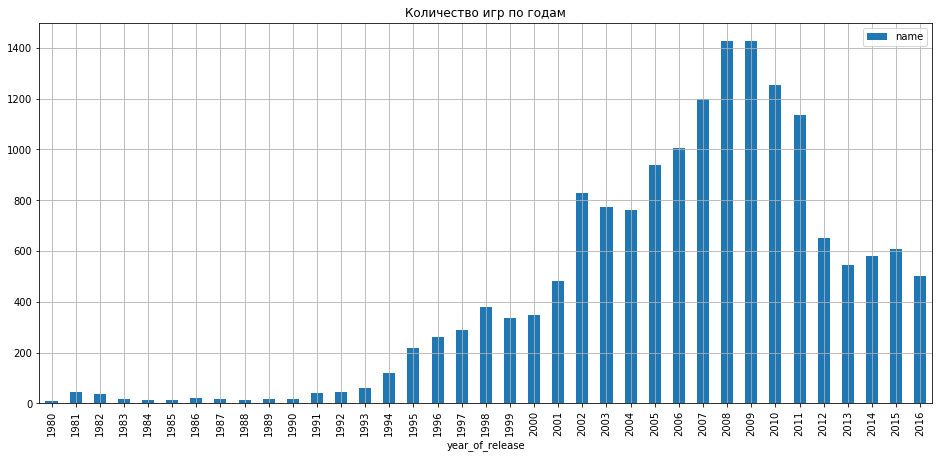

In [28]:
data.groupby('year_of_release').agg({'name':'count'}). \
plot(y='name', kind='bar',figsize=(16,7), title='Количество игр по годам', grid=True);

# Построение столбчатой диаграммы

По графику можно заметить, что начиная с 1980 и до, приблизительно, 1993 года игр выпускалось сравнительно мало.

Максимальное количество выпущенных игр было зафиксированно в 2008 и 2009 года

Посмотрим зависимость продажи по платформам

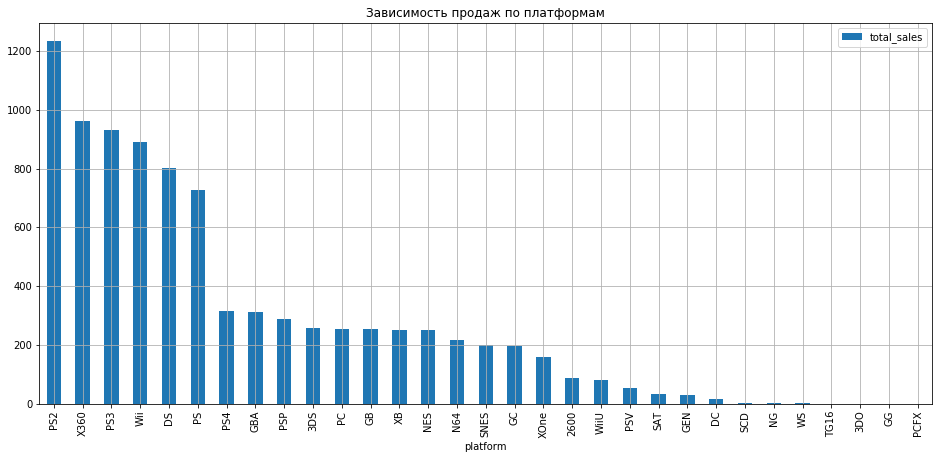

In [29]:
data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales', ascending=False). \
plot(y='total_sales', kind='bar',figsize=(16,7), title='Зависимость продаж по платформам', grid=True);

# Построение столбчатой диаграммы

Игры на платформы PS2, X360, Wii, PS3, DS, PS являются самыми продаваемыми за все время.

Для каждой из них построим распределение по годам

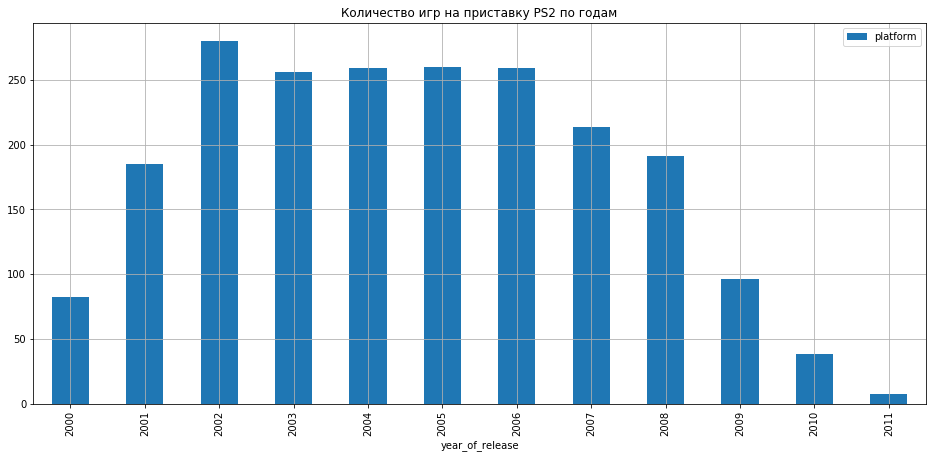

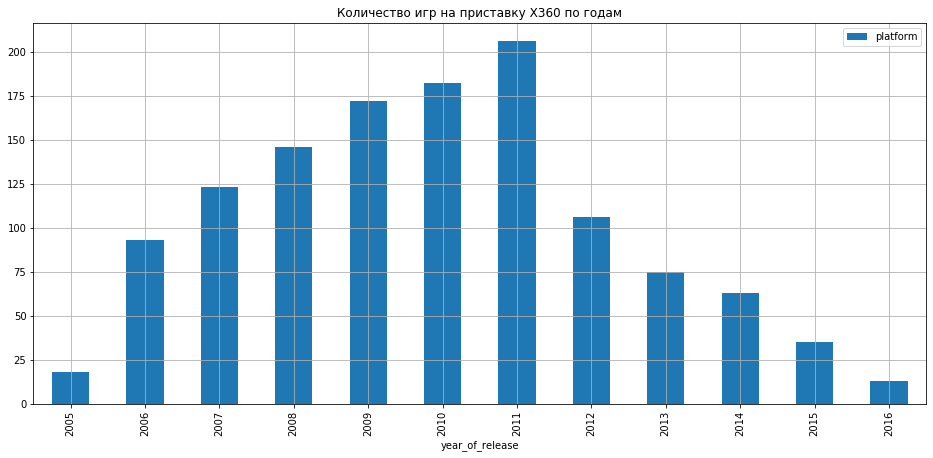

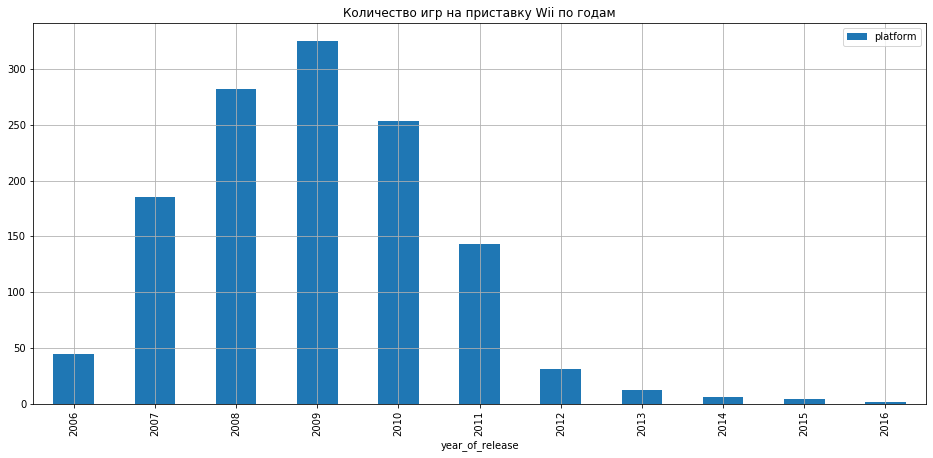

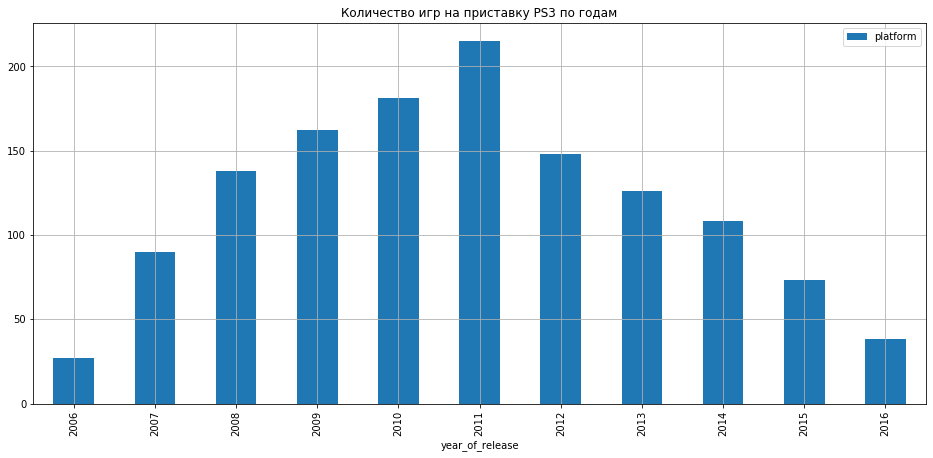

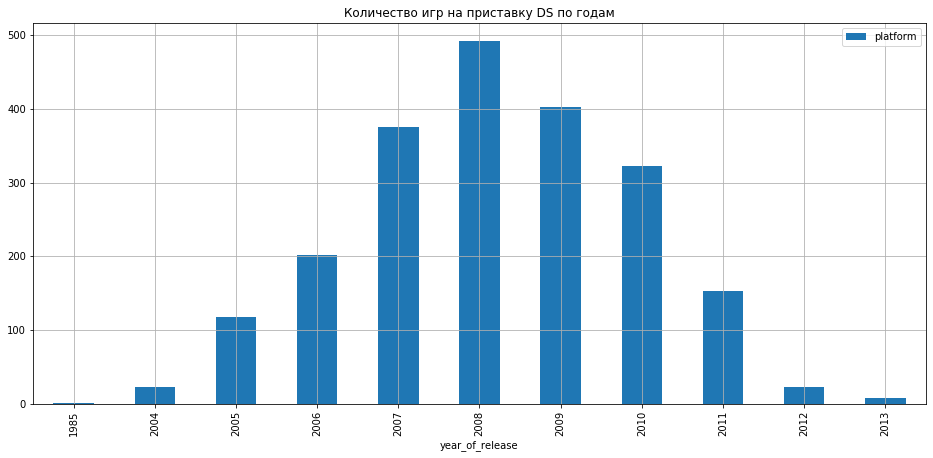

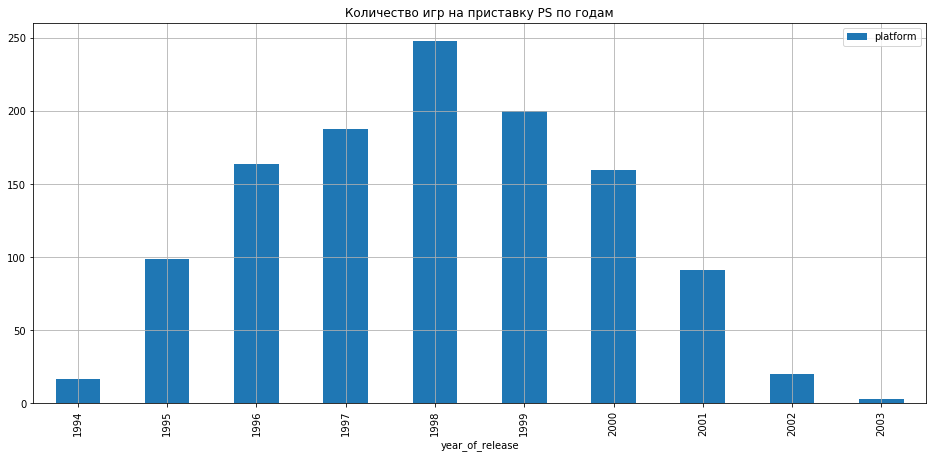

In [30]:
best_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

for best_platform in best_platforms:
    data.query('platform in @best_platform').groupby('year_of_release').agg({'platform':'count'}). \
    plot(y='platform', kind='bar',figsize=(16,7), title='Количество игр на приставку '+ best_platform + ' по годам', grid=True)
    
# Построение столбчатых диаграмм для каждой платформы

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>
    
Отличные графики 👍</div>

По графикам можно заметить, что средняя "продолжительность жизни" каждой из платформ составляет примерно 10 лет.

Соответсвенно сделаем новый датасет, в котором будут отражены только релевантные платформы, продажа игр на которых может принести прибыль интернет-магазину "Стримчик".

Сделаем срез по данным, возьмём половину "продолжительности жизни" каждой из платформ и будем использовать данные только за 2012 год и дальше

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера ✔️</b>
    
Да, примерно столько они и живут.    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
Решая эту задачу, я тоже сначала взяла лет 10. Но потом до меня дошло, что рынок динамичен, все меняется. Некогда популярный жанр за 10 лет может стать не таким популярным. И наоборот. Так что за это время несколько поколений сменятся :) А мы зацепим мертвые платформы и неактуальные предпочтения пользователей. Да и очевидно, что платформа, появившаяся в 2004 году и ставшая очень популярной, набрала больше продаж, чем новенькая консоль, у которой все еще впереди. Индустрия развивается, игры становятся лучше, графика лучше, а пользователи — более требовательными. В таких задачах нам нужна свежная информация, свежая оценка. Если прогнозируем на 2017 год, то какая разница, что было 10 лет назад? Потенциально прибыльные платформы мы можем легко отобрать по графикам и таблице прадаж. Но пользовательские портреты могут поменяться. Больше 3-5 лет берут не так часто, только если товару требуется время зарекоменовать себя, а это трудно отнести к такой бурно развивающейся отрасли. Можно взять половину жизненного цикла.
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Полностью с тобой согласен, изменил срез</div> 

In [31]:
relevant_data = data[data['year_of_release'] >= 2012] # Срез данных
relevant_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>
    
Да, так безопаснее, ведь именно лет 5 надо консоли, чтобы подняться в продажах и пойти на спад. А сам период начнется, когда нынешние топы только вышли или вот-вот выйдут на рынок :)</div>

По новым данным найдём какие платформы лидируют по продажам

In [32]:

pivot_relevant_data = relevant_data.pivot_table \
(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
pivot_relevant_data

# Построение сводной таблицы

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


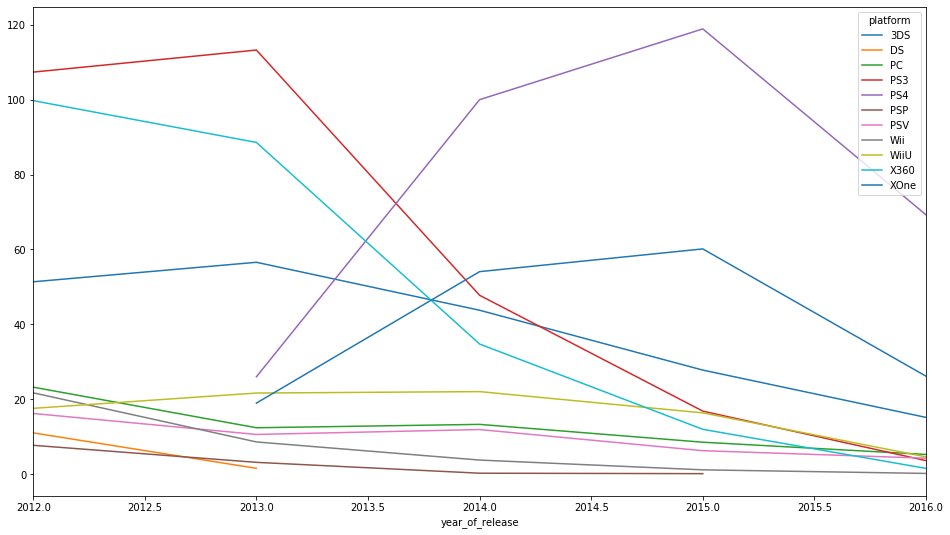

In [33]:
pivot_relevant_data.plot(figsize=(16,9));

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
С этой функцией бывают проблемы. Перепроверь ее на всякий случай.  </div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Действителььно, локально она работа, здесь выдаёт ошибку.
Принял решение поменять метод построения на более привычный</div> 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>
    
Здесь просто не самые новые версии библиотек. </div>

По сводной таблице и графику заметны следующие особенности:

- Лидирующие позиции по продажам к 2016 году занимают платформы `XOne`, `PS4`, `3DS`
- Прослеживается общая тенденция спада продаж игр на платформах

Построим диаграмму размаха для платформ `XOne`, `PS4`, `3DS`

(0, 2)

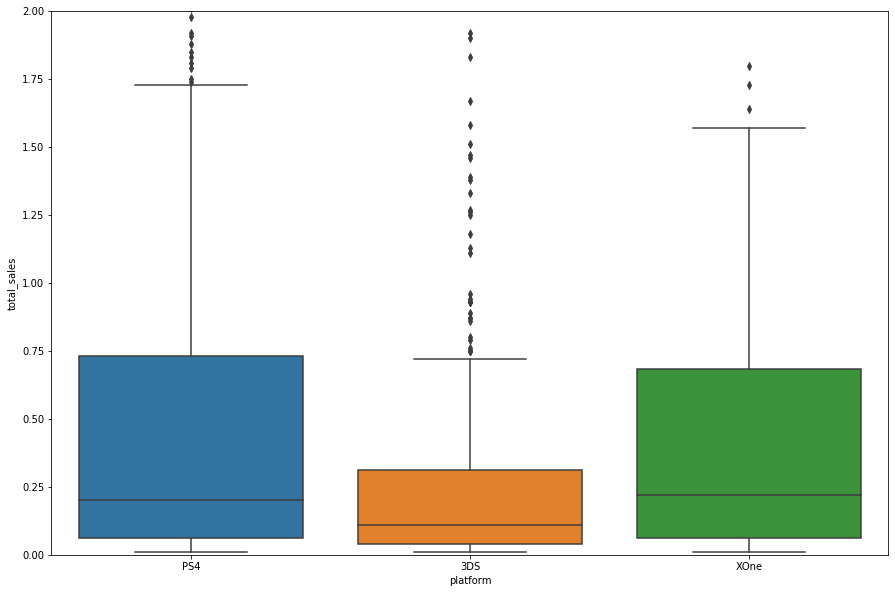

In [34]:
c = sns.boxplot(x="platform", y="total_sales", data=relevant_data.query('platform in ["XOne","PS4","3DS"]')) 
c.figure.set_figwidth(15)
c.figure.set_figheight(10)
plt.ylim(0,2)

# Построение ящика с усами

Построим такие же диаграммы размаха для всех платформ

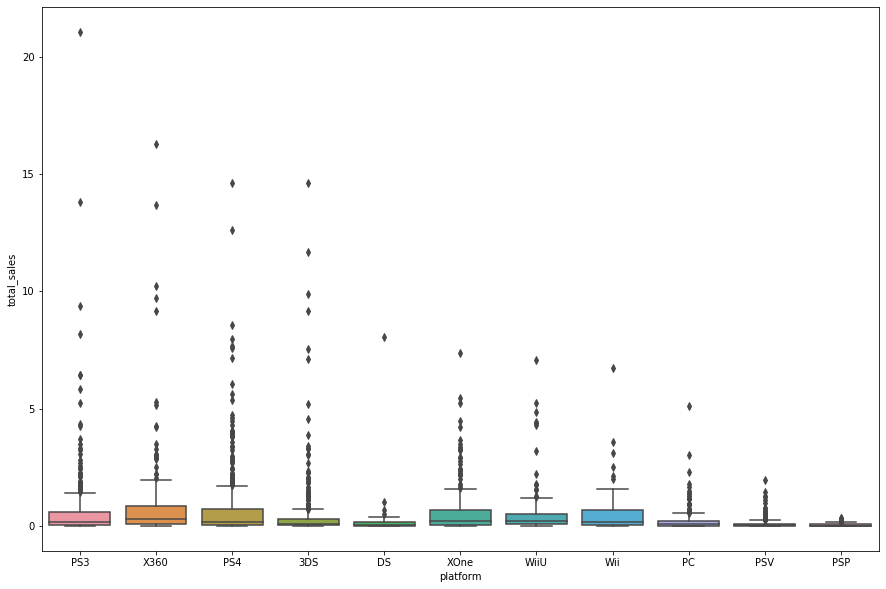

In [35]:
c = sns.boxplot(x="platform", y="total_sales", data=relevant_data)
c.figure.set_figwidth(15)
c.figure.set_figheight(10)

# Построение ящика с усами

Черные точки на графике обозначают выбросы - нехарактерные значения того или иного признака. Обычно выбросы выбиваются из нормального распределения.

Таким образом можем заметить, что абсолютным рекорсдменом по количеству проданных копий одной игры является платформа `PS3`

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ❌</b>
    
Добавь, пожалуйста, пару слов про выбросы. Это важно, поскольку не каждый клиент умеет правильно интерпретировать подобные диаграммы. 
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2  ✔️</h2>
    
А раз мы изображаем распределение, на котором отображены все игры, то можно сказать, что выбросы это какие-то популярные игры. И это очень показательная штука. Посмотри на 3DS. Маленький ящик и много выбросов. Это говорит о том, что большАя часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве. 
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Поправил:)</div> 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Построим диаграмму рессеяния и посчитаем коэффициент корреляции между отзывами и продажами.

В качестве популярной платформы выберем - `PS4`

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера ❌ </b>
    
Не забудь убрать нули, которыми были заменены пропуски.</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Здесь всё норм, так как пропуски убирать не стал</div> 

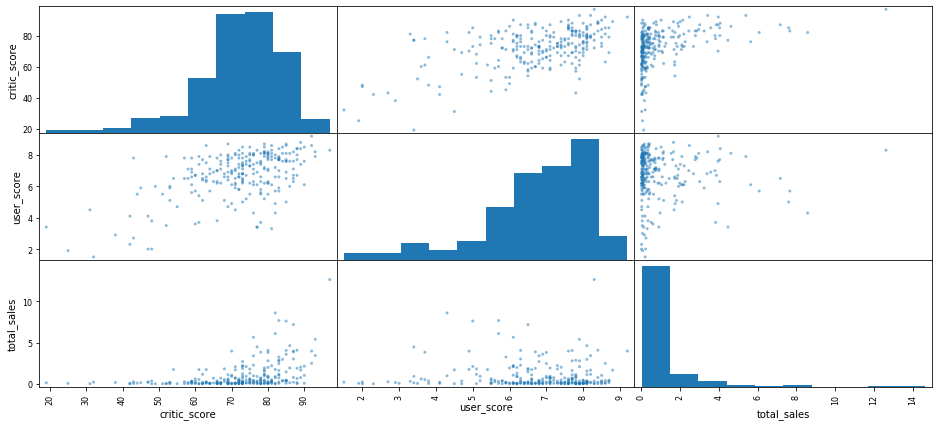

In [36]:
pd.plotting.scatter_matrix(relevant_data.query('platform == "PS4"')
                           [['critic_score', 'user_score','total_sales']],figsize=(16,7));

# Строим парные диаграммы рассеяния

Коэффициент корреляции Пирсона между всеми парами столбцов

In [37]:
relevant_data.query('platform == "PS4"')[['critic_score', 'user_score','total_sales']].corr() 

# Коэффициент корреляции Пирсона между всеми парами столбцов

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Таким образом, корреляция между `total_sales` и `user_score` равняется примерно -0.03, а между `total_sales` и `critic_score`  0.40

Построим диаграмму рессеяния и посчитаем коэффициент корреляции между отзывами и продажами для платформы `Xone`

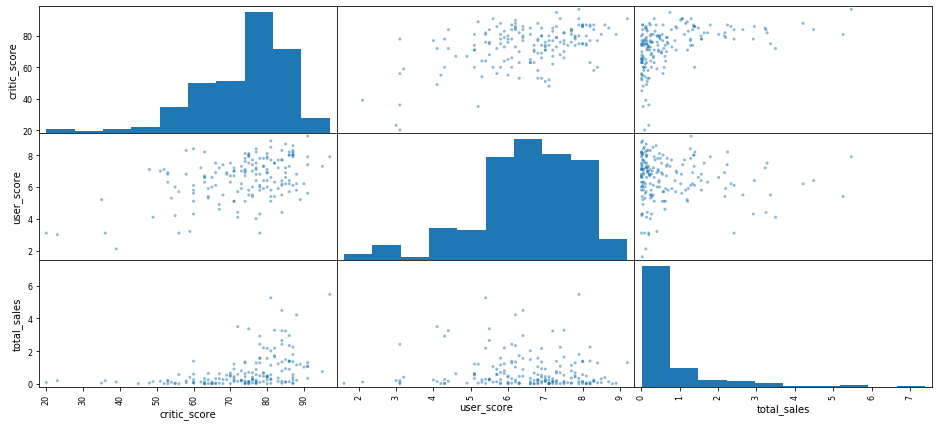

In [38]:
pd.plotting.scatter_matrix(relevant_data.query('platform == "XOne"')
                           [['critic_score', 'user_score','total_sales']],figsize=(16,7));

# Строим парные диаграммы рассеяния

Коэффициент корреляции 

In [39]:
relevant_data.query('platform == "XOne"')[['critic_score', 'user_score','total_sales']].corr()

# Коэффициент корреляции Пирсона между всеми парами столбцов

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


Для платформы `XOne` коэффициент корреляции между `total_sales` и `user_score` равняется -0.06, для `total_sales` и `critic_score` - 0.41

Дополнительно построим диаграмму рессеяния и посчитаем коэффициент корреляции между отзывами и продажами для платформы `3DS
` 

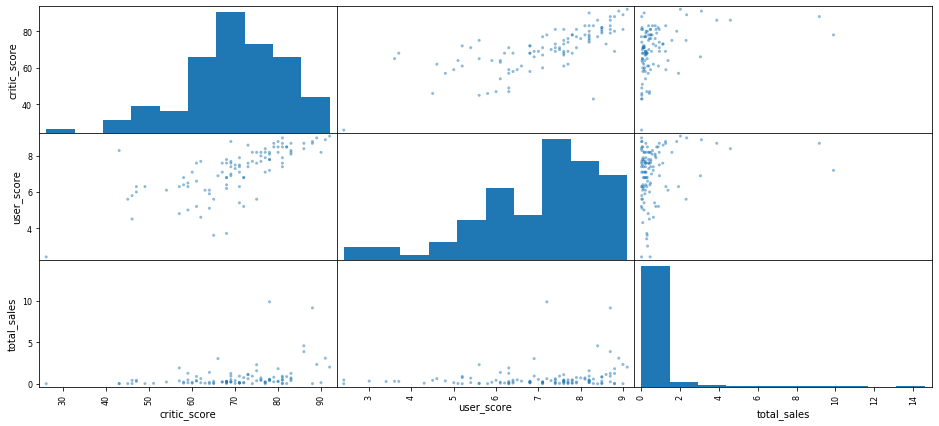

In [40]:
pd.plotting.scatter_matrix(relevant_data.query('platform == "3DS"')
                           [['critic_score', 'user_score','total_sales']],figsize=(16,7));

# Строим парные диаграммы рассеяния

Коэффициенты корреляции для платформы `3DS`

In [41]:
relevant_data.query('platform == "3DS"')[['critic_score', 'user_score','total_sales']].corr()

# Коэффициент корреляции Пирсона между всеми парами столбцов

,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000


Для платформы `3DS` коэффициент корреляции между `total_sales` и `user_score` -  0.19, для `total_sales` и `critic_score` - 0.32

Рассмотрим общее распределние игр по жанрам

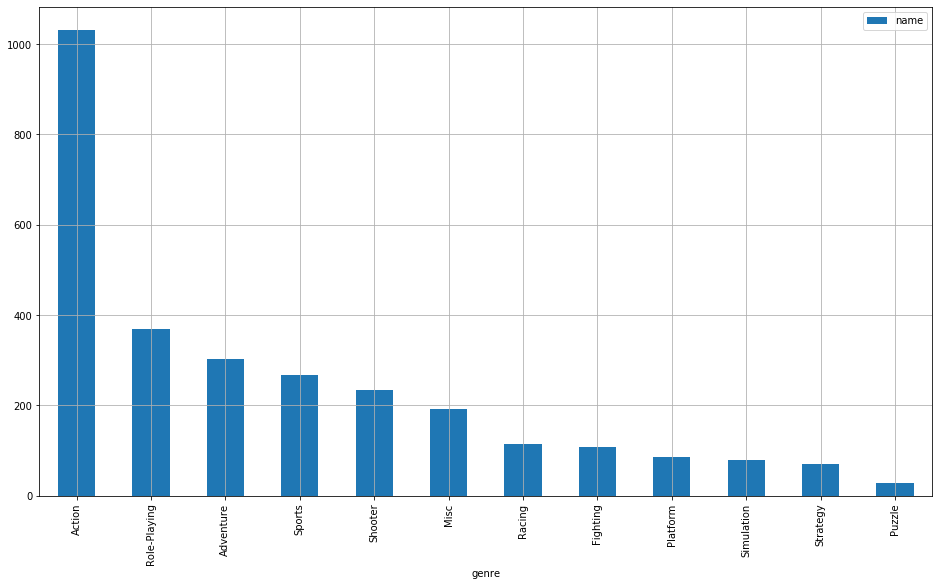

In [42]:
relevant_data.groupby('genre').agg({'name':'count'}).sort_values('name', ascending=False) \
.plot(y='name',kind='bar',figsize=(16,9), grid=True);

# Столбчатая диаграмма

Наиболее популярный жанр за последние 5 лет - `Action`.

Определим самый прибыльный жанр

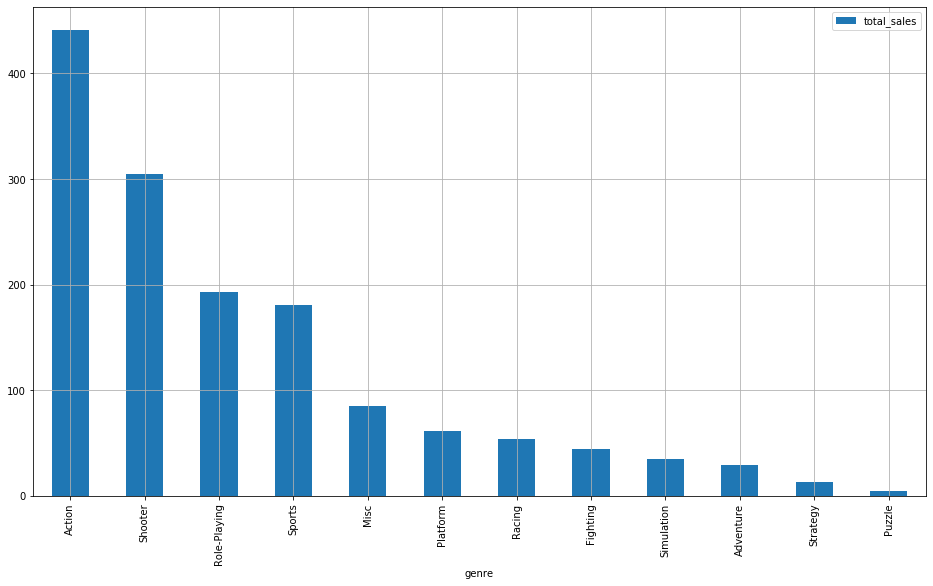

In [43]:
relevant_data.groupby('genre').agg({'total_sales':'sum'}).sort_values('total_sales', ascending=False) \
.plot(y='total_sales',kind='bar',figsize=(16,9), grid=True);

# Столбчатая диаграмма

Из графика видно, что помимо того, что жанр `Action` является самый популярным, так ещё и самым успешным в продажах. после него идут жанры `Shooter` и `Role-Playing`.

Наименьшей успешностью по продажа обладают жанры `Strategy` и `Puzzle`

Рассмотрим ситуацию, что экшн делает продажи только за счет большего количества игр и большого количества бестселлеров.Быть может, другие жанры имеют больше продаж в расчете на единицу игры.

Создадим отдельный датафрейм, к которому добавим дополнительный столбец `relate_success`, в нем будет отражено суммарное количество продаж на единицу выпущенных игр

In [44]:
example_data = relevant_data.groupby('genre').agg({'name':'count','total_sales':'sum'}). \
rename(columns = ({'name':'count_of_games','total_sales':'total_sales'}))
example_data['relate_success'] = example_data['total_sales']/example_data['count_of_games']
example_data

,count_of_games,total_sales,relate_success
genre,,,
Action,1031,441.12,0.427856
Adventure,302,29.43,0.097450
Fighting,109,44.49,0.408165
Misc,192,85.04,0.442917
Platform,85,61.00,0.717647
Puzzle,28,4.89,0.174643
Racing,115,53.50,0.465217
Role-Playing,370,192.80,0.521081
Shooter,235,304.73,1.296723


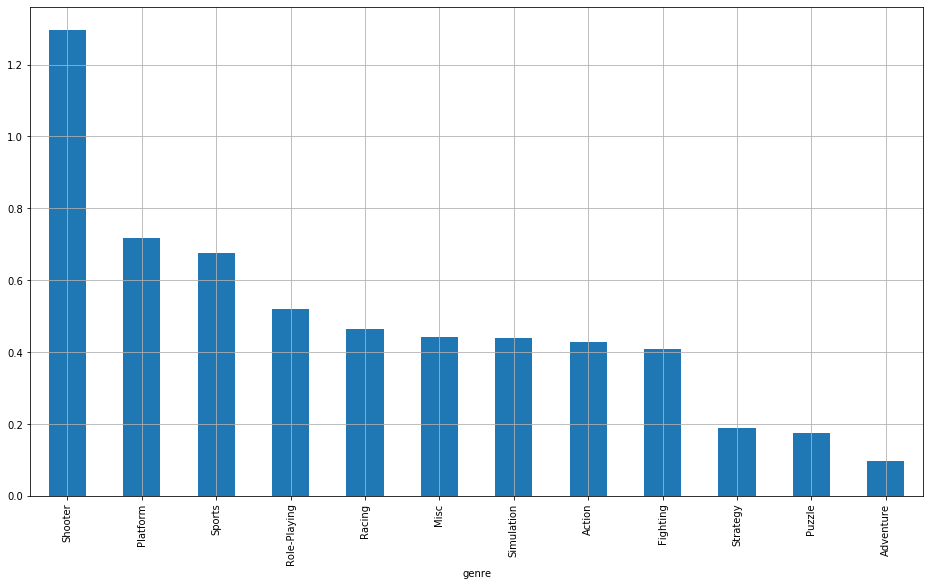

In [45]:
example_data['relate_success'].sort_values(ascending=False).plot(y='relate_success', kind='bar',figsize=(16,9), grid=True);

Можем заметить, что в данном случае лидирующие позиции занимает жанр `Shooter`

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера ❌ </b>
    
Вообще, про прибыльность мы тут говорить не можем, ведь речь о млн копий, да и нет у нас информации о себестоимости. Тут имеется в виду скорее успешность в продажах. Хорошо. А может ли быть такая ситуация, что экшн делает продажи только за счет большего количества игр и большого количества бестселлеров? Быть может, другие жанры имеют больше продаж в расчете на единицу игры. Можно сделать то же самое, но с медианными/средними  продажами.
</div>



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Спасибо за наводку на другой подход!
Думаю мне ещё предстоит научиться смотреть на проблему не только под прямым углом</div> 

<div class="alert alert-success " style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2  ✔️</h2>
    
Теперь экшн не такой популярный :) Это нам говорит о том, что у этого жанра очень много игр, которые мало покупают. А вот у шутера гораздо больше игр покупают в большом количестве. 


А насчет наводки.. Это ведь с опытом приходит. Как уравнения, которые мы учимся решать в школе. Сначала мы умеем только самые простые решать. Потом постепенно переходим к более сложным и узнаем другие методы их решения. Например, замена переменной. Прорешав множество уравнений, мы уже понимаем, что тут лучше поступить так, а в другом примере лучше поступить иначе. Потом переходим на следующий уровень. Например, логарифмические или вообще дифференциальные или интегральные уравнения. После последних школьные кажутся ерундой. Тут то же самое. Уверена, сейчас первый проект этого курса кажется тебе смешным :) Так что не переживай даже. </div>

## Вывод

##### В ходе исследовательского анализа были выполнены следующие шаги:

- Построили столбчатую диаграмму зависимости количества игр от года выпуска. По графику можно заметить, что начиная с 1980 и до, приблизительно, 1993 года игр выпускалось сравнительно мало. Максимальное количество выпущенных игр было зафиксированно в 2008 и 2009 года
- Определили, что платформы PS2, X360, Wii, PS3, DS, PS являются самыми продаваемыми за все время. Для каждой из них построили распределение по годам выпуска и определили, что средняя "продолжительность жизни" каждой из платформ составляет примерно 5 лет. Сделали новый датасет, в котором были отражены только релевантные платформы, продажа игр на которых может принести прибыль интернет-магазину "Стримчик"
- Лидирующие позиции по продажам к 2016 году занимают платформы XOne, PS4, 3DS
- Прослеживается общая тенденция спада продаж игр на платформах
- Построили диаграммы разамаха для всех существующих платформ. Опредилили, на платформе 3DS выходили игры, которые продавались тиражём максимально около 14 млн. копий.
- Выяснили, что абсолютным рекорсдменом по количеству проданных копий одной игры является платформа PS3
- Для платформ XOne, PS4, 3DS выявили как влияют на продажи отзывы пользователей и критиков.
- Нашли самый популярный жанр в играх за последние 10 лет - `Action`
- Определили, что помимо того, что жанр `Action` является самый популярным, так ещё и самым успешным по продажам. 
- Наименьшей успешностью в продажах обладают жанры `Puzzle` и `Strategy`
- Так же провели дополнительное исследование, предположив, что жанр `Action` делает продажи только за счет большего количества игр и большого количества бестселлеров и, быть может, другие жанры имеют больше продаж в расчете на единицу игры. Исследование оказалось проведено не зря - мы выявили, что лидирующие позиции в этом случае занимает жанр `Shooter`



    

# Портрет пользователя каждого региона

Определим для каждого региона топ 5 самых популярных платформ

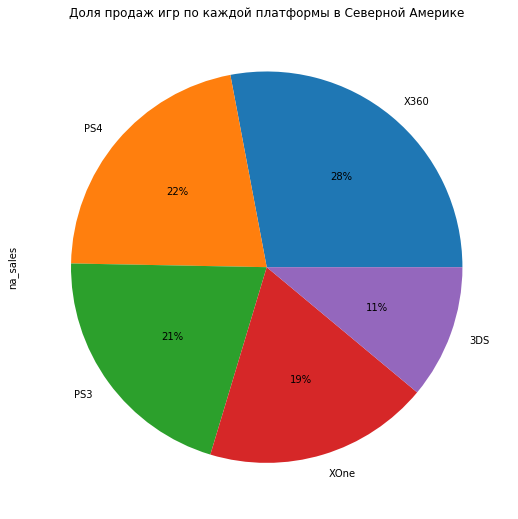

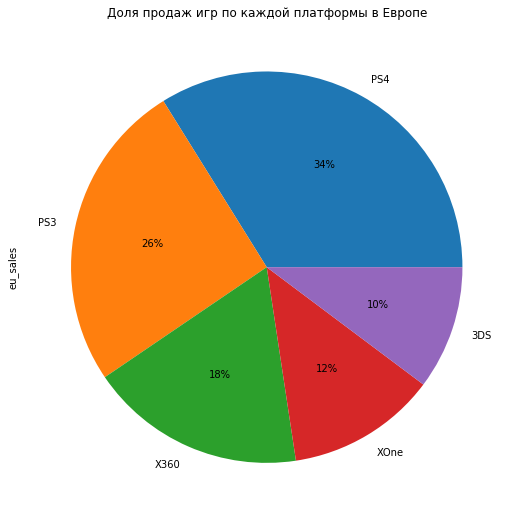

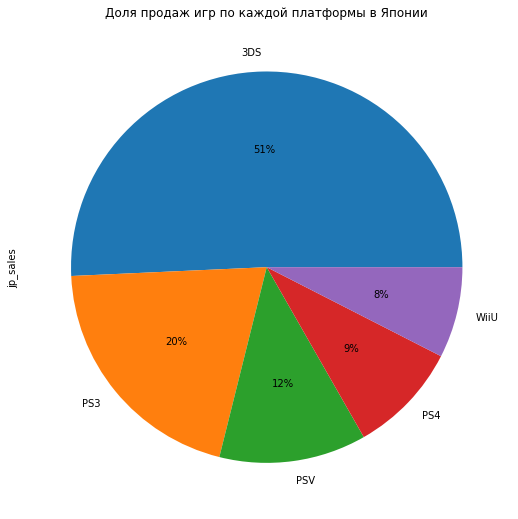

In [46]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
name_of_region = ['Северной Америке', 'Европе', 'Японии']
for i in range(len(regions)):
    relevant_data.groupby('platform').agg({regions[i]:'sum'}).sort_values(by=regions[i],ascending=False).head(5) \
    .plot(y=regions[i], kind='pie',figsize=(16,9),autopct='%1.0f%%', legend=False, 
          title='Доля продаж игр по каждой платформы в '+ name_of_region[i]);

# Строим круговые диаграммы по регионам

В Северной Америке лидирующие позиции на рынке плафторм занимает XOne, в Европе - PS3, в Японии наиболее популярные платформа - 3DS

Наименее популярные платформы:
- Северная Америка - PS4
- Европа - PS4
- Япония - Wii

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>
    
DS уже мертва вообще. Подозреваю, что вывод остался старый просто. 
    
    
Похоже, что японцы больше любят портативные консоли и родной рынок. Игры на иксбоксы там продвигать точно не стоит :)
</div>

Для каждого региона определим самые популярные жанры

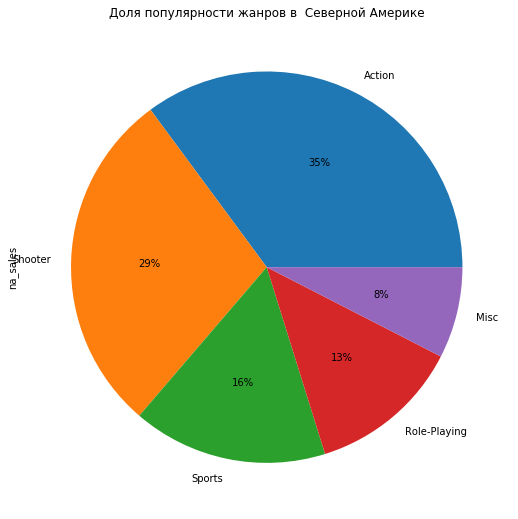

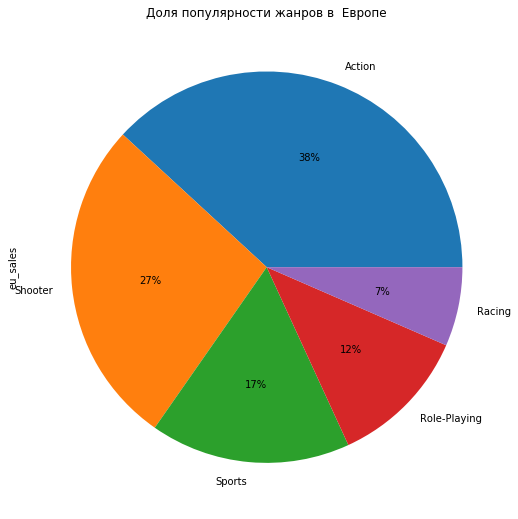

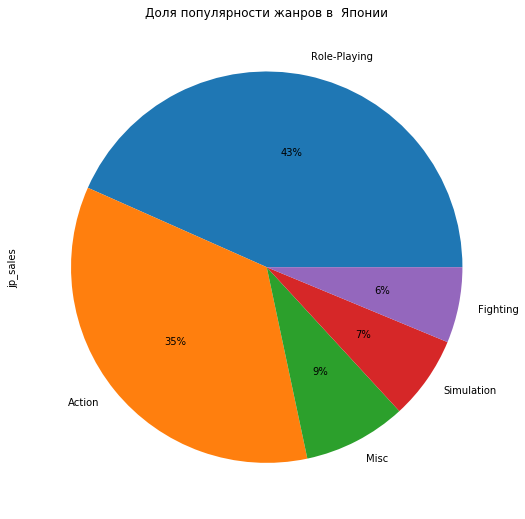

In [47]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
name_of_region = ['Северной Америке', 'Европе', 'Японии']
for i in range(len(regions)):
    relevant_data.groupby('genre').agg({regions[i]:'sum'}).sort_values(by=regions[i],ascending=False).head(5) \
    .plot(y=regions[i], kind='pie',figsize=(16,9),autopct='%1.0f%%', legend=False, 
          title='Доля популярности жанров в  '+ name_of_region[i]);
    
# Строим круговые диаграммы по регионам

В Северной Америке и Европе самый популярный жанр - `Action`, в Японии - `Role-Playing`

Наимение популярный жанр в Севервной Америке - `Role-Playing`, в Европе - `Racing`, в Японии - `Adventure`

Проверим влияние рейтинга ESRB на продажи в отдельном регионе

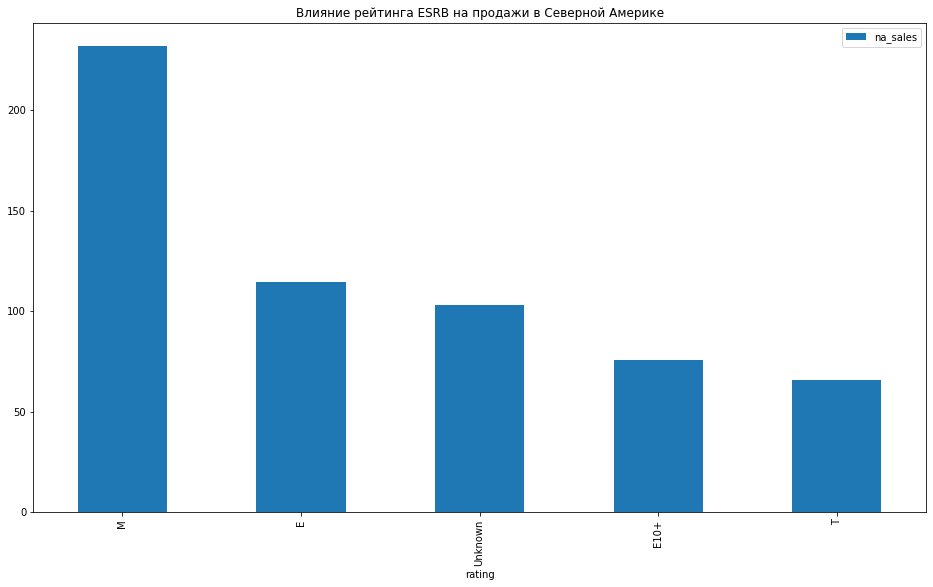

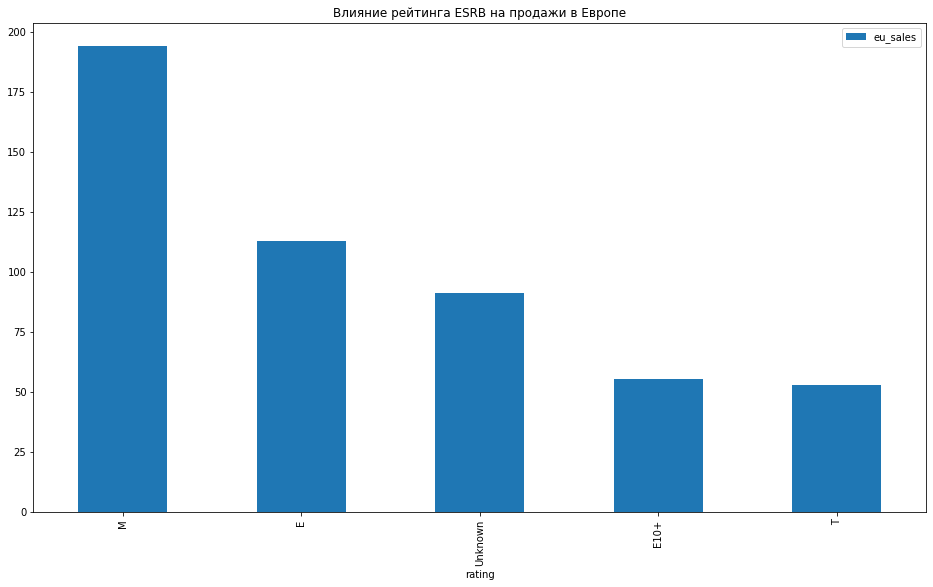

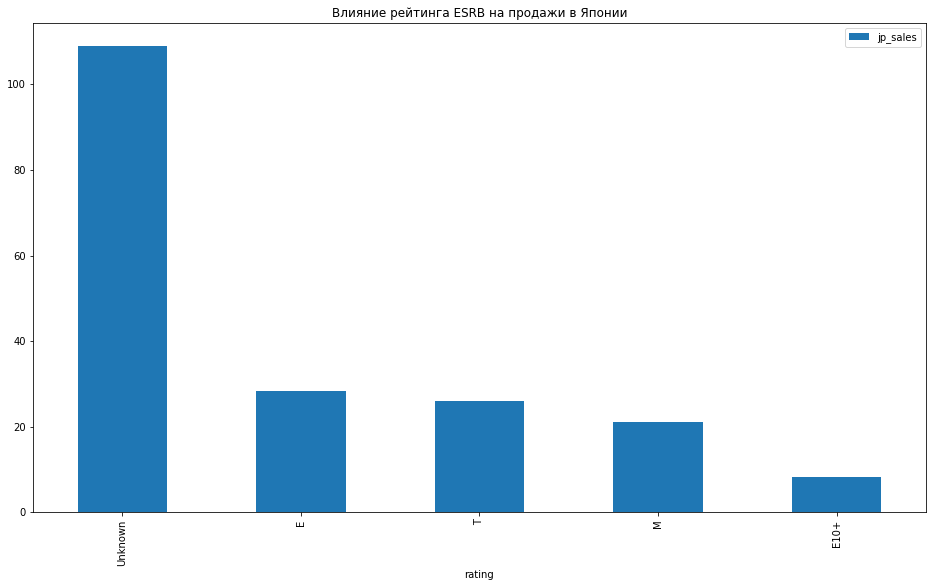

In [48]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
name_of_region = ['Северной Америке', 'Европе', 'Японии']
for i in range(len(regions)):
    relevant_data.groupby('rating').agg({regions[i]:'sum'}).sort_values(by=regions[i],ascending=False).head(5) \
    .plot(y=regions[i], kind='bar',figsize=(16,9), legend=True, 
          title='Влияние рейтинга ESRB на продажи в '+ name_of_region[i]);

# Строим столбчатые диаграммы

Влияние рейтинга ESRB на продажи в Северной Америке:

- Игры с рейтингом Е продаются в Северной Америке лучше остальных.
- Игры без возрастного рейтинга, в свою очередь, имеют самые меньшие продажи

Влияние рейтинга ESRB на продажи в Европе:

- Игры с рейтингом Е и М продаются в Северной Америке лучше остальных.
- Игры с рейтингом E10+ продаются хуже всего

Влияние рейтинга ESRB на продажи в Японии:
- Интересный момент, в Японии игры без возрастного рейтинга продаются примерно в 2,5 раза лучше, чем ближайший по популярности жанр E. Вероятнее всего, это связанно с тем, что наиболее популярная платформа в Японии - 3DS. Эта платформа разработана в Японии и, скорее всего, большинство игр на платформе имеет свой возрастной рейтинг, но от другой организации (не от ESRB). Соответственно возрастной рейтинг для игр на платформе 3DS мы узнать не можем, так как данные, представленные в таблице, отражают возрастной рейтинг только согласно ESRB
- Игры с рейтингом E10+ продаются хуже всего

Напомним аббревиатуры рейтингов:

- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
-  «K-A» («Kids to Adults»)— «Для детей и взрослых»

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера ❌ </b>
    
> Интересный момент, в Японии игры без возрастного рейтинга продаются примерно в 2,5 раза лучше


Как думаешь, почему такое может быть?</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Описание выше в ячейки :)</div> 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>

Согласна с тобой. Уж наверняка дело тут в том, что ESRB работает только на территории СА, в Японии есть аналогичная организация: CERO. Я думаю, что, с одной стороны, иностранным играм они (ESRB) не присваивают рейтинги, поскольку на них уже есть маркировка. Чтобы не было конфликта, так сказать. Так что вполне возможно, что часть игр это продукция Японии или же это корейские игры (там тоже своя организация). С другой стороны, раз они продают игры на своем рынке, то присвоение рейтинга может быть обязательным. Значит, дело еще может быть в том, что наша таблица это склейка двух таблиц: продажи на Западе и на Востоке. Так или иначе, это очень показательный пример. И именно разница в рынках (восточный и западный) наталкивает на мысль о неслучайности пропусков.

</div>

## Вывод

В ходе исследования портретов пользователей каждого регионы были выявлены следующие особенности:

1. В Северной Америке лидирующие позиции на рынке плафторм занимает XOne, в Европе - PS3, в Японии наиболее популярные платформы - 3DS И DS

   Наименее популярные платформы:
    Северная Америка - PS4;
    Европа - DS;
    Япония - Wii;
    
    
2.  В Северной Америке и Европе самый популярный жанр - Action, в Японии - Role-Playing.
    Наимение популярный жанр в Северной Америке - Role-Playing, в Европе - Racing, в Японии - Adventure
    
    
3.  - Влияние рейтинга ESRB на продажи в Северной Америке:

    Игры с рейтингом Е продаются в Северной Америке лучше остальных.
    Игры без возрастного рейтинга, в свою очередь, имеют самые меньшие продажи
    
    - Влияние рейтинга ESRB на продажи в Европе:

    Игры с рейтингом Е и М продаются в Северной Америке лучше остальных.
    Игры с рейтингом E10+ продаются хуже всего
    
    - Влияние рейтинга ESRB на продажи в Японии:

    Интересный момент, в Японии игры без возрастного рейтинга продаются примерно в 2,5 раза лучше, чем ближайший по    популярности жанр E. Вероятнее всего, это связанно с тем, что наиболее популярная платформа в Японии - 3DS. Эта платформа разработана в Японии и, скорее всего, большинство игр на платформе имеет свой возрастной рейтинг, но от другой организации (не от ESRB). Соответственно возрастной рейтинг для игр на платформе 3DS мы узнать не можем, так как данные, представленные в таблице, отражают возрастной рейтинг только согласно ESRB.
    Игры с рейтингом E10+ продаются хуже всего


# Проверка гипотез

Проверим гипотезу о том, что средние пользовательские оценки платформ PC и Xbox one одинаковые

Сформилуруем нулевую и альтернативные гипотезы:

H0: Cредние пользовательсские оценки платформ PC и Xbox one одинаковые

H1: Cредние пользовательсские оценки платформ PC и Xbox one разные

Уровень значимости примем равный 0.05

Для сравнения двух выборок будем использовать t-тест.

Удостоверимся, что все три аспекта удовлетворяют условиям проведения  t-теста:

- [x]  Генеральные совокупности не должны зависеть друг от друга. Генеральные совокупности независимы друг от друга
- [x] Выборочные средние должны быть нормально распределены. Благодрая ЦПТ, утверждение верно
- [x] Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, такой подход оправдан

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid">
<b> Комментарий ревьюера ❌ </b>
    
Нули (пропуски в оценках) стоит откинуть.</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Сделанно</div> 

In [49]:
alpha = 0.05 # Уровень значимости

results = st.ttest_ind(relevant_data.dropna().query('platform in "PS4"')['user_score'],
                       relevant_data.dropna().query('platform in "XOne"')['user_score']) # Проведение t-теста
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Недостаточно оснований для того, чтобы отклонить нулевую гипотезу')

p-value:  0.13589706893007367
Недостаточно оснований для того, чтобы отклонить нулевую гипотезу


В результате проверки гипотезы получили значение p-value значительно больше, чем пороговый уровень значимости, таким образом не имеем статистически значимых оснований отклонить нулевую гипотезу

Так же проверим гипотезу о том, что средние пользовательские оценки жанров `Action` и `Sports` разные

Сформулируем нулевую и альтернативную гипотезы:

H0: Cредние пользовательские оценки жанров `Action` и `Sports` равны

H1: Cредние пользовательские оценки жанров `Action` и `Sports` разные

Уровень значимости примем равный 0.05

Удостоверимся, что все три аспекта удовлетворяют условиям проведения  t-теста:

- [x]  Генеральные совокупности не должны зависеть друг от друга. Генеральные совокупности независимы друг от друга
- [x] Выборочные средние должны быть нормально распределены. Благодрая ЦПТ, утверждение верно
- [x] Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, такой подход оправдан

In [50]:
alpha = 0.05 # уровень значимости

results = st.ttest_ind(relevant_data.dropna().query('genre in "Action"')['user_score'],
                       relevant_data.dropna().query('genre in "Sports"')['user_score'])
print('p-value: ', results.pvalue)

if results.pvalue < alpha: # Проведение t-теста
    print('Отклоняем нулевую гипотезу')
else:
    print('Недостаточно оснований для того, чтобы отклонить нулевую гипотезу')

p-value:  9.13633279873618e-16
Отклоняем нулевую гипотезу


Получили статистически значимое различие, соответсвенно отклоняем нулевую гипотезу о том, что средние пользовательские оценки жанров Action и Sports равны

## Вывод

В ходе исследования были проверены две гипотезы:

- Cредние пользовательсские оценки платформ PC и Xbox one одинаковые. Не получили статистически значимый результат, следовательно не имеем оснований отклонить нулевую гипотезу.
- Cредние пользовательские оценки жанров Action и Sports равны. Получили статистически значимое различие, соответсвенно отклоняем нулевую гипотезу.

# Вывод

При выполнении проекта были проделаны следующие шаги:

- Получение основной информации о предоставленных данных
- Предобработка, которая включала в себя приведение данных у нужному типу, проанализированы пропущенные значения в некоторых столбцах, сделаны выводы. Для каждой выпущенной игры была просуммированна выручка по каждому из регионов и добавлена в отдельный столбец `total_sales`
- Проведён исследовательский анализ данных, в котором было определено количество игр, выпущенных в разные годы релиза, найдена зависимость количество продаж по разным платформам, выявлены платформы с наибольшим суммарными продажами, определена средняя "продолжительность жизни" платформы - 10 лет. Так же построена зависимости суммарных продаж по каждой платформе в зависимости от года, определена общяя тенденция к снижению выручки к 2016 году. Найдены коэффициенты корреляции между суммарным количеством продаж и отзывами пользователей и критиков. Выявлены самые популярные и прибыльные жанры.
- Составлены портреты пользователя каждого региона: самые популярные платформы, самые популярные жанры в Северной Америке, Европе и Японии. Отражена зависимость между рейтингом ESRB и продажами в каждом регионе.
- Проверена статистическая гипотеза о равенстве средних пользовательсских оценок платформ PC и Xbox one. Не получили статистически значимый результат, следовательно не имели оснований отклонить нулевую гипотезу.
- Проверена статистическая гипотеза о равенстве средних пользовательских оценок жанров Action и Sports. Получили статистически значимое различие, соответсвенно отклоняли нулевую гипотезу. 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера 2 ✔️</h2>

Все отлично. В идеале, чтобы вывод не состоял из одних результатов (что сделали), стоит добавлять полученные ранее числовые значения или выводы из результатов. Здесь это просто список перспективных консолей и краткий обзор по регионам: 2-3 консоли, 2-3 жанра и рейтинги.
</div>